


# K Means


In [27]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline  

from sklearn.metrics import silhouette_score
from sklearn import cluster, datasets, mixture
from sklearn.neighbors import kneighbors_graph

np.random.seed(844)
clust1 = np.random.normal(5, 2, (1000,2))
clust2 = np.random.normal(15, 3, (1000,2))
clust3 = np.random.multivariate_normal([17,3], [[1,0],[0,1]], 1000)
clust4 = np.random.multivariate_normal([2,16], [[1,0],[0,1]], 1000)
dataset1 = np.concatenate((clust1, clust2, clust3, clust4))

# we take the first array as the second array has the cluster labels
dataset2 = datasets.make_circles(n_samples=1000, factor=.5, noise=.05)[0]



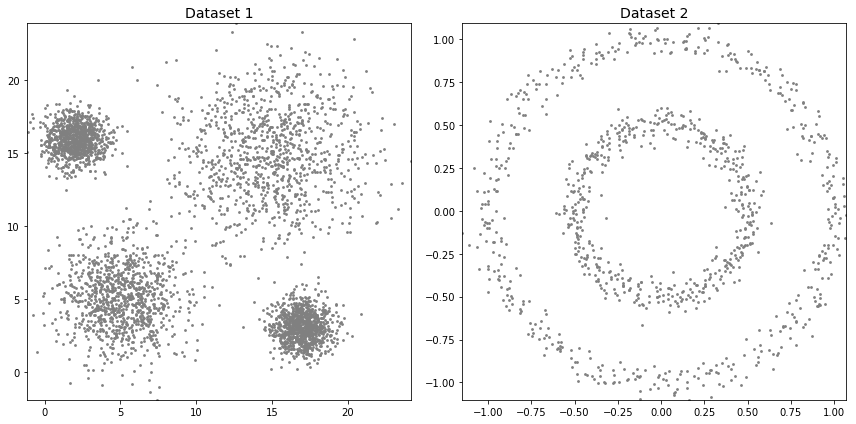

In [54]:
# plot clustering output on the two datasets
def plot_two_cluster(df1, df2, color1, color2, title1,  title2):
    fig, (ax1,ax2) = plt.subplots(1, 2)
    fig.set_size_inches(6*2, 3*2)
    ax1.set_title(title1,fontsize=14)
    ax1.set_xlim(min(df1[:,0]), max(df1[:,0]))
    ax1.set_ylim(min(df1[:,1]), max(df1[:,1]))
    ax1.scatter(df1[:, 0], df1[:, 1],s=8,lw=0,c= color1)
    
    ax2.set_title(title2,fontsize=14)
    ax2.set_xlim(min(df2[:,0]), max(df2[:,0]))
    ax2.set_ylim(min(df2[:,1]), max(df2[:,1]))
    ax2.scatter(df2[:, 0], df2[:, 1],s=8,lw=0,c=color2)
    fig.tight_layout()
    plt.show()

    # plot clustering output on the two datasets
def plot_one_cluster(df1, color1, title1):
    fig, (ax) = plt.subplots(1, 1)
    fig.set_size_inches(6*2, 3*2)
    ax.set_title(title1,fontsize=14)
    ax.set_xlim(min(df1[:,0]), max(df1[:,0]))
    ax.set_ylim(min(df1[:,1]), max(df1[:,1]))
    ax.scatter(df1[:, 0], df1[:, 1],s=8,lw=0,c= color1)
    fig.tight_layout()
    plt.show()
    
plot_two_cluster(df1=dataset1, df2=dataset2, color1 = 'gray', color2 = 'gray', title1 = 'Dataset 1',  title2 = 'Dataset 2')

## K-means

K-means in scikit provides some benefits over the traditional approach. 

* n_init :The former just reruns the algorithm with n different initialisations and returns the best output (measured by the within cluster sum of squares). 
* init='kmeans++' : The initial centres are smartly selected (i.e. better than random). 

In [47]:
# applying k-means
kmeans_dataset1 = cluster.KMeans(n_clusters=4, max_iter=300, init='k-means++',n_init=10).fit_predict(dataset1)
kmeans_dataset2 = cluster.KMeans(n_clusters=2, max_iter=300, init='k-means++',n_init=10).fit_predict(dataset2)


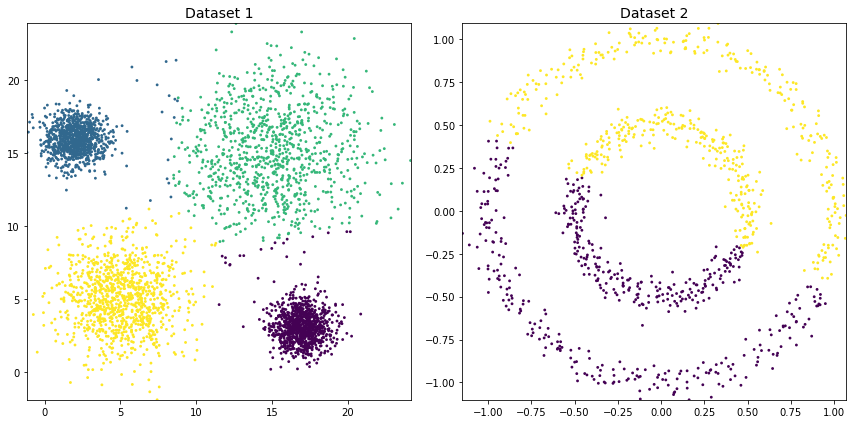

In [51]:

plot_two_cluster(df1=dataset1, df2=dataset2, color1 = kmeans_dataset1,
              color2 = kmeans_dataset2, title1 = 'Dataset 1',  title2 = 'Dataset 2')

k-means performs quite well on ``Dataset1``, but fails miserably on ``Dataset2``. In fact, these two datasets illustrate the strenghts and weaknesses of k-means. The algorithm seeks and identifies globular (essentially spherical) clusters. If this assumption doesn't hold, the model output may be inadaquate (or just really bad). It doesn't end there; k-means can also underperform with clusters of different size and density.

In [55]:
kmeans_dataset1 = cluster.KMeans(n_clusters=4, max_iter=300, 
                                 init='k-means++',n_init=10).fit_predict(np.vstack([dataset1[:2080,:],
                                                                                    dataset1[3000:3080,:]]))
kmeans_dataset2 = cluster.KMeans(n_clusters=4, max_iter=300, 
                                 init='k-means++',n_init=10).fit_predict(np.vstack([dataset1[-2080:,],
                                                                                    dataset1[:80,]]))

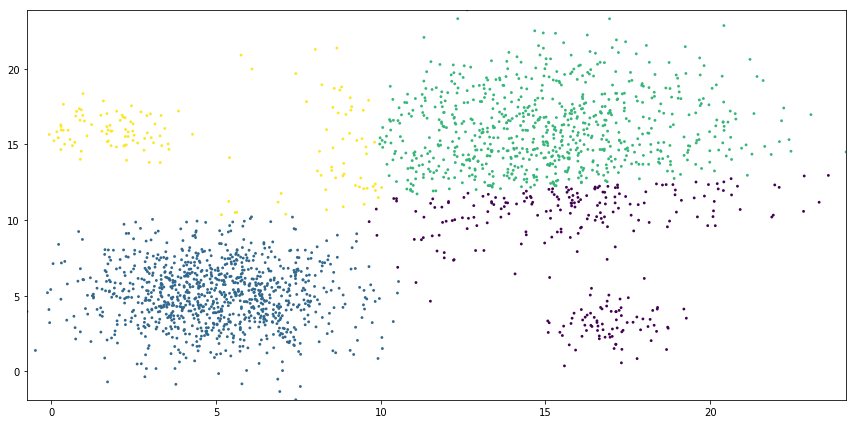

In [56]:
plot_one_cluster(np.vstack([dataset1[:2080,],dataset1[3000:3080,]]), kmeans_dataset1, title1='')

## Pros

Average complexity is O(k*n*T), where k,n and T are the number of clusters, samples and iterations, respectively. 
As such, it's considered one of the fastest clustering algorithms out there

# Variations of K-Means


Variations on the k-means algorithm include [k-medoids](https://en.wikipedia.org/wiki/K-medoids) and [k-medians](https://en.wikipedia.org/wiki/K-medians_clustering), where centroids are updated to the [medoid](https://en.wikipedia.org/wiki/Medoid) and median of existng clusters, repsectively. Note that, under k-medoids, cluster centroids must correspond to the members of the dataset. 

# Reference
* The [scikit clustering documentation](http://scikit-learn.org/stable/modules/clustering.html)